In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,NuSVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/AIX360')


In [2]:
df = pd.read_csv("./data/total_data.csv")
#drop index column
df = df.drop(df.columns[0], axis=1)
df = df.drop(["away_team_rest_time"], axis=1)
# Due to high correlation with 'away_team_rest_time'

In [3]:

y = df["result"]
X = df.drop(["result"], axis=1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 121)

In [4]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(data=scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(data=scaled_X_test, columns=X_test.columns)

# BRCG

In [5]:
# Binarize data and also return standardized ordinal features
from aix360.algorithms.rbm import FeatureBinarizer
fb = FeatureBinarizer(negations=True, returnOrd=True)
dfTrain, dfTrainStd = fb.fit_transform(X_train)
dfTest, dfTestStd = fb.transform(X_test)
dfTrain['away_team_away_form'].head()

operation        <=                                                    \
value     -1.590154 -1.177178 -0.839591 -0.543881 -0.227995  0.045947   
419               0         0         0         0         0         0   
1060              0         0         0         1         1         1   
594               0         0         0         0         0         0   
569               0         0         0         1         1         1   
340               0         0         0         0         0         0   

operation                                       >                      \
value      0.393384  0.815182  1.382233 -1.590154 -1.177178 -0.839591   
419               0         0         1         1         1         1   
1060              1         1         1         1         1         1   
594               1         1         1         1         1         1   
569               1         1         1         1         1         1   
340               1         1         1         1         1         1   

operation                                                              
value     -0.543881 -0.227995  0.045947  0.393384  0.815182  1.382233  
419               1         1         1         1         1         0  
1060              0         0         0         0         0         0  
594               1         1         1         0         0         0  
569               0         0         0         0         0         0  
340               1         1         1         0         0         0

In [8]:
# Instantiate BRCG with small complexity penalty and large beam search width
from aix360.algorithms.rbm import BooleanRuleCG
br = BooleanRuleCG(lambda0=1e-3, lambda1=1e-3, CNF=False)

# Train, print, and evaluate model
br.fit(dfTrain, y_train)
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(y_train, br.predict(dfTrain)))
print('Test accuracy:', accuracy_score(y_test, br.predict(dfTest)))
print('Predict Y=1 if ANY of the following rules are satisfied, otherwise Y=0:')
print(br.explain()['rules'])

Learning DNF rule with complexity parameters lambda0=0.001, lambda1=0.001


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Initial LP solved
Iteration: 1, Objective: 0.3049


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 2, Objective: 0.2745


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 3, Objective: 0.2745


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 4, Objective: 0.2732


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 5, Objective: 0.2719


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 6, Objective: 0.2715


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 7, Objective: 0.2709


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 8, Objective: 0.2700


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 9, Objective: 0.2696


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 10, Objective: 0.2696


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Iteration: 11, Objective: 0.2696


/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/expressions/expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)
/home/abhinav/.local/lib/python3.6/site-packages/cvxpy/e

Training accuracy: 0.7218992248062015
Test accuracy: 0.7248062015503876
Predict Y=1 if ANY of the following rules are satisfied, otherwise Y=0:
['away_last_yr_pos > 3.00 AND h2h_form > -1.02 AND home_last_yr_pos <= 10.00 AND home_win_percentage > 10.53']


# LRR

In [9]:
# Instantiate LRR with good complexity penalties and numerical features
from aix360.algorithms.rbm import LogisticRuleRegression
lrr = LogisticRuleRegression(lambda0=0.005, lambda1=0.001, useOrd=True)

# Train, print, and evaluate model
lrr.fit(dfTrain, y_train, dfTrainStd)
print('Training accuracy:', accuracy_score(y_train, lrr.predict(dfTrain, dfTrainStd)))
print('Test accuracy:', accuracy_score(y_test, lrr.predict(dfTest, dfTestStd)))
print('Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))')
print('where z is a linear combination of the following rules/numerical features:')
lrr.explain()

/home/abhinav/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/abhinav/AIX360/aix360/algorithms/rbm/beam_search.py:58: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  zOut = pd.Series(index=X.columns)
/home/abhinav/AIX360/aix360/algorithms/rbm/beam_search.py:58: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  zOut = pd.Series(index=X.columns)
/home/abhinav/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/abhinav/AIX360/aix360/algori

Training accuracy: 0.7722868217054264
Test accuracy: 0.7209302325581395
Probability of Y=1 is predicted as logistic(z) = 1 / (1 + exp(-z))
where z is a linear combination of the following rules/numerical features:


/home/abhinav/.local/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,rule/numerical feature,coefficient
0,(intercept),-0.21519
1,away_current_pos <= 12.00 AND away_last_yr_pos...,-2.22622
2,h2h_form > -1.02 AND home_current_pos <= 12.00...,2.15266
3,away_team_av_points_conceded > 21.71 AND home_...,1.28848
4,away_current_pos <= 12.00 AND away_team_av_poi...,-1.11425
5,home_last_yr_pos <= 10.00,0.882276
6,away_last_yr_pos,-0.860501
7,away_last_yr_pos <= 5.00,-0.826546
8,home_team_av_points_conceded <= 21.65,0.645709
9,away_team_av_points <= 21.29,0.606867


# ProtoDash

In [50]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

from aix360.algorithms.contrastive import CEMExplainer, KerasClassifier
from aix360.algorithms.protodash import ProtodashExplainer
from aix360.datasets.heloc_dataset import HELOCDataset

Using TensorFlow backend.


In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 24)
pd.set_option('display.width', 1000)
print("Size of dataset:", df.shape)
print("Number of Home wins:", np.sum(df['result']==1))
print("Number of Away wins:", np.sum(df['result']==0))
print("Sample Applicants:")
df.tail(10).transpose()

Size of dataset: (1290, 20)
Number of Home wins: 709
Number of Away wins: 581
Sample Applicants:


,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289
away_current_pos,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
away_last_yr_pos,4.000000,1.000000,3.000000,2.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000
away_prev_game_perf,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
away_team_av_points,23.076930,23.618189,25.137136,22.459714,23.049235,23.079388,24.507014,23.290808,23.791155,23.136117
away_team_av_points_conceded,20.505407,22.008963,21.457601,22.450659,21.123460,21.498768,21.383092,22.092545,22.285179,22.501229
away_team_away_form,0.286755,2.370514,2.157252,0.001581,0.629404,0.703523,1.925802,-0.037181,0.940642,0.170255
away_team_form,0.761289,0.737275,2.565949,-0.269035,1.007225,1.005780,2.521766,0.763699,0.933930,0.248767
away_win_percentage,76.000000,87.500000,92.000000,57.692308,77.777778,78.571429,92.857143,76.666667,86.666667,75.000000
h2h_form,1.565894,-0.852715,-1.343240,1.274592,0.482172,0.075245,-0.660196,-0.071844,0.257475,0.194020
home_current_pos,2.000000,3.000000,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000


Distribution of h2h_form and home_win_percentage columns:


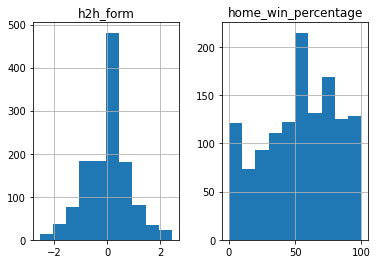

In [18]:
# Plot (example) distributions for two features
print("Distribution of h2h_form and home_win_percentage columns:")
hist = df.hist(column=['h2h_form', 'home_win_percentage'], bins=10)

In [27]:
#train SVM model
SVM = SVC(probability = True)

SVM.fit(scaled_X_train,y_train)
y_pred = SVM.predict(scaled_X_test)
y_train_pred = SVM.predict(scaled_X_train)
y_pred=y_pred.reshape(y_pred.shape[0],1)
y_train_pred=y_train_pred.reshape(y_train_pred.shape[0],1)

In [28]:
#print(scaled_X_train.shape,y_train_pred.shape)
z_train = np.hstack((scaled_X_train, y_train_pred)) # Store (normalized) instances that were predicted as Good
z_train_good = z_train[z_train[:,-1]==1, :]

zun_train = np.hstack((X_train, y_train_pred)) # Store (unnormalized) instances that were predicted as Good 
zun_train_good = zun_train[zun_train[:,-1]==1, :]

In [32]:
print(y_pred[9])

[1]


In [49]:
idx = 9
#print(type(scaled_X_test))
X_np=scaled_X_test.to_numpy()
X = X_np[9].reshape((1,) + X_np[idx].shape)
#print(X)
print("Chosen Sample:", idx)
print("Prediction made by the model:", SVM.predict(X))
print("Prediction probabilities:", SVM.predict_proba(X))
print("")

# attach the prediction made by the model to X
X = np.hstack((X, SVM.predict(X).reshape((1,1))))
X_test_np=X_test.to_numpy()
Xun = X_test_np[idx].reshape((1,) + X_test_np[idx].shape) 
dfx = pd.DataFrame.from_records(Xun.astype('double')) # Create dataframe with original feature values
dfx[20] = X[0, -1]
dfx.columns = df.columns
dfx.transpose()


Chosen Sample: 9
Prediction made by the model: [1]
Prediction probabilities: [[0.39969592 0.60030408]]



,0
away_current_pos,9.000000
away_last_yr_pos,6.000000
away_prev_game_perf,0.000000
away_team_av_points,20.625339
away_team_av_points_conceded,23.639974
away_team_away_form,-1.182160
away_team_form,-1.575138
away_win_percentage,25.000000
h2h_form,-0.920000
home_current_pos,7.000000


In [51]:
explainer = ProtodashExplainer()
(W, S, setValues) = explainer.explain(X, z_train_good, m=5) # Return weights W, Prototypes S and objective function values

In [52]:
dfs = pd.DataFrame.from_records(zun_train_good[S, 0:-1].astype('double'))
RP=[]
for i in range(S.shape[0]):
    RP.append(z_train_good[S[i], -1]) # Append class names
dfs[23] = RP
dfs.columns = df.columns  
dfs["Weight"] = np.around(W, 5)/np.sum(np.around(W, 5)) # Calculate normalized importance weights
dfs.transpose()

,0,1,2,3,4
away_current_pos,10.000000,4.000000,11.000000,3.000000,12.000000
away_last_yr_pos,6.000000,5.000000,12.000000,1.000000,7.000000
away_prev_game_perf,0.000000,1.000000,0.000000,0.000000,0.000000
away_team_av_points,19.980841,22.527697,19.386943,22.595913,20.696490
away_team_av_points_conceded,22.730040,22.569650,21.219804,22.704641,23.667746
away_team_away_form,-0.974211,0.153105,-1.697470,0.073060,-1.457805
away_team_form,-1.361555,0.210976,-1.316285,0.158080,-1.483199
away_win_percentage,23.529412,100.000000,16.666667,79.310345,0.000000
h2h_form,-1.464000,0.720000,0.000000,-0.208000,0.892186
home_current_pos,6.000000,12.000000,10.000000,6.000000,9.000000


In [53]:
z = z_train_good[S, 0:-1] # Store chosen prototypes
eps = 1e-10 # Small constant defined to eliminate divide-by-zero errors
fwt = np.zeros(z.shape)
for i in range (z.shape[0]):
    for j in range(z.shape[1]):
        fwt[i, j] = np.exp(-1 * abs(X[0, j] - z[i,j])/(np.std(z[:, j])+eps)) # Compute feature similarity in [0,1]
                
# move wts to a dataframe to display
dfw = pd.DataFrame.from_records(np.around(fwt.astype('double'), 2))
dfw.columns = df.columns[:-1]
dfw.transpose()        

,0,1,2,3,4
away_current_pos,0.77,0.26,0.59,0.20,0.45
away_last_yr_pos,1.00,0.75,0.18,0.24,0.75
away_prev_game_perf,1.00,0.08,1.00,1.00,1.00
away_team_av_points,0.61,0.23,0.39,0.22,0.95
away_team_av_points_conceded,0.31,0.26,0.05,0.30,0.97
away_team_away_form,0.76,0.18,0.51,0.19,0.70
away_team_form,0.76,0.10,0.72,0.11,0.89
away_win_percentage,0.96,0.14,0.81,0.25,0.52
h2h_form,0.52,0.14,0.33,0.43,0.11
home_current_pos,0.65,0.12,0.28,0.65,0.42


#### Explanation:
The above table depicts the five closest training matches to the chosen test matches. Based on importance weight outputted by the method, we see that the prototype under column zero is the most representative user profile by far. This is (intuitively) confirmed from the feature similarity table above where almost all of the features (17 out of 19) of this prototype are more than 50% to that of the chosen user whose prediction we want to explain. 
